# Hierarchical Clustering (HC) with Dendrogram and Agglomerative HC Implementation
    Author: Adeyemi Adedoyin Simeon
    Email: adeyemi.sa1@gmail.com
    Date: Nov. 6, 2019
    Version: 1.0
    
    'Please reference the author when you use any or part(s) of the codes here.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Dataset

You can download the dataset from <a href="https://raw.githubusercontent.com/tobbyGithub/ML-CSC715/master/Delivery_fleet.csv" target="_blank"> Delivery Fleet Dataset.csv </a>

In [5]:
ds = pd.read_csv('../Datasets/Delivery Fleet Dataset.csv')

In [6]:
ds.head(3)

,Unnamed: 0,Driver_ID,Distance_Feature,Speeding_Feature
0,0,3423311935,71.24,28.0
1,1,3423313212,52.53,25.0
2,2,3423313724,64.54,27.0


In [8]:
X = ds[['Distance_Feature', 'Speeding_Feature']]

In [9]:
X.head(3)

,Distance_Feature,Speeding_Feature
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0


## Importing Dendrogram Algorithm Specific Libraries

In [12]:
# Note: To measure performance of Hierarchical Clustering Algorithm, we use "wcv" (Within Cluster Variance) 
# instead of wcss in K-Means. We try to minimize the 'wcv'. The less the wcv, the better the algorithm.

# To use "wcv" specify the keyword argument, method="ward", in the scipy.cluster.hierarchical.linkage() method. 
# linkage() is the actual Hierarchical Algorithm.

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage

## Building the Dendrogram Hierarchical Clustering

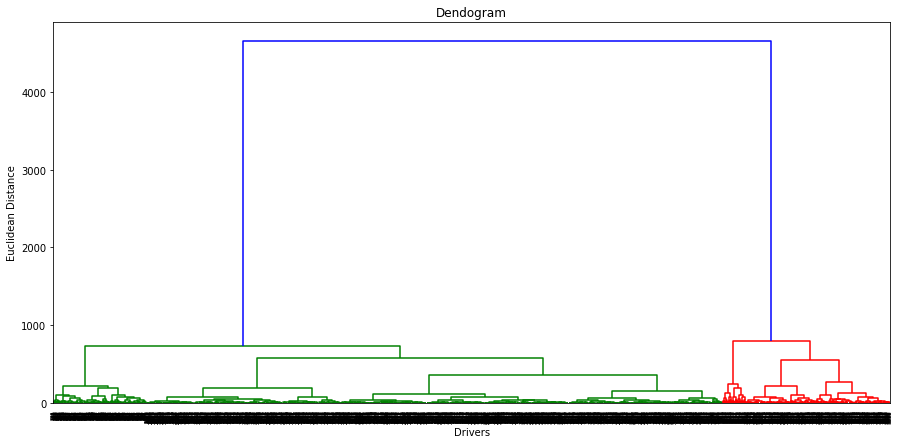

In [21]:
plt.figure(figsize=(15,7))

dendrogram_obj = dendrogram(linkage(X, method='ward', metric='euclidean'))

# Visualizing the Dendogram
plt.title('Dendogram')
plt.xlabel('Drivers')
plt.ylabel('Euclidean Distance')
plt.show()

    1. Agglomerative Hierarchical Clustering (Bottom-Up)
    2. Divisive Hierarchical Clustering (Top-down)
    
    We are going to use Aglomerative Hierarchical Clustering.
    
    From the Dendogram above, 
    Our Optimal Number of clusters is the dendogram with the highest distance (bar/vertical line) 
    without crossing an horizontal line.
    
    So, Optimal Number of Clusters = 2

# Fitting the Hierarchical Clusering to the Dataset Using the Optimal Cluster Number
    k = 2, is the Optimum

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [24]:
y_hc

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [26]:
X_copy = X.copy()
X_copy['Predicted Cluster'] = y_hc
# OR X_copy1['Predicted Cluster'] = hc.labels_
X_copy

,Distance_Feature,Speeding_Feature,Predicted Cluster
0,71.24,28.0,1
1,52.53,25.0,1
2,64.54,27.0,1
3,55.69,22.0,1
4,54.58,25.0,1
...,...,...,...
3995,160.04,10.0,0
3996,176.17,5.0,0
3997,170.91,12.0,0
3998,176.14,5.0,0


In [28]:
X_copy['Predicted Cluster'].value_counts()

1    3200
0     800
Name: Predicted Cluster, dtype: int64

# Visualizing the Clusters

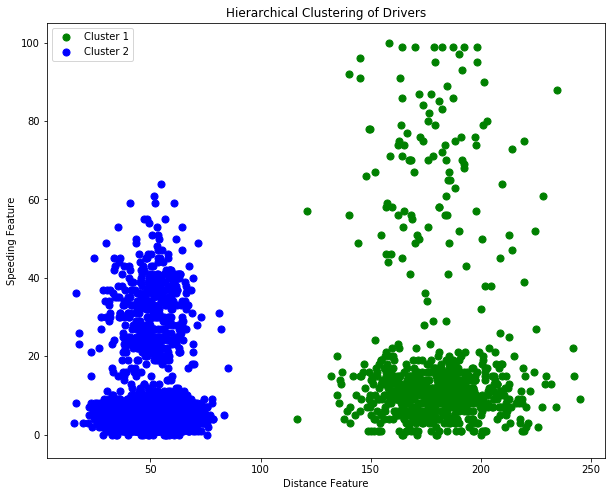

In [31]:
plt.figure(figsize=(10,8))

plt.scatter(X[y_hc == 0]['Distance_Feature'], X[y_hc == 0]['Speeding_Feature'], s=50, c='green', label='Cluster 1')
plt.scatter(X[y_hc == 1]['Distance_Feature'], X[y_hc == 1]['Speeding_Feature'], s=50, c='blue', label='Cluster 2')

plt.title('Hierarchical Clustering of Drivers')
plt.xlabel('Distance Feature')
plt.ylabel('Speeding Feature')
plt.legend(loc='upper left')
plt.show()